# Direcionamentos

- Primeiro, dar uma geral nas bibliotecas e documentação
- Permitir seleção apenas de escolas públicas
- Usar dados do [CNES](https://basedosdados.org/dataset/354d6d98-bc09-4e22-a58a-e4eac3a5283c?table=72505728-8867-4b6f-8afd-b732de55854e)
    - Importar a tabela e juntar com a daqui pelo `id_estabelecimento_cnes` e, se a memória me serve `code_cnes`
    - Dados são atualizados mensalmente: definir um default (202303), mas permitir generalização
    - Permitir seleção por complexidade de saúde: primário, secundário, terciário
    - Permitir diferenciar pelo vínculo ou não com o SUS (se é saúde pública ou privada)
    - Acrescentar quantidade de leitos e consultórios
    - Acrescentar [quantidade de profissionais por estabelecimento](https://basedosdados.org/dataset/354d6d98-bc09-4e22-a58a-e4eac3a5283c?table=58b8c805-9f83-42fc-a699-8b0abd34b109)
    - Estou em dúvida sobre manter apenas pessoas jurídicas. Por ora, deixa pessoas juricias apenas como padrão, mas permitindo tirar essa restrição se possível
    - Manter atendimento hospitalar e ambulatorial apenas
- Fazer revisão geral do código e propor, se e quando necessário, melhorias
- Talvez ajude ver [aqui](https://github.com/ipeaGIT/acesso_oport/blob/ab7988f0f9587b35ef466dec31818a73efc30167/R/fun/saude/saude.R).

- Deixar mapa final mais bonito:
    - Pensar que o mapa, embora a princípio usado para ser visto aqui no notebook mesmo, é interessante que possa ser pensado para plotar em uma folha A4 de um relatório, por exemplo. Ver [aqui](https://pythonforthelab.com/blog/python-tip-ready-publish-matplotlib-figures/).
    - Colocar um fundo bonito como o [CartoDB](https://contextily.readthedocs.io/en/latest/intro_guide.html), por exemplo


- **FUTURO**: fazer [junção espacial](https://geopandas.org/en/stable/gallery/spatial_joins.html) dos resultados em [hexágonos H3](https://h3geo.org/docs) 

## Análise de Pontos de Interesse (POIs) e Rede Roteável com OSMnx e Pandana

*TO DO: Aceita caminhada, por ora. Incorporar modos motorizados*

**AUTORIA:** [REDE MOB](https://www.redemob.com.br/), a partir de [um repositório no GitHub](https://github.com/eemilhaa/walkability-analysis).

Com uma combinação de OSMnx e Pandana, cria uma rede roteável e associa localizações de pontos de interesse (POIs) a esta rede. Para esta parte da análise, permite utilizar tanto o grafo completo quanto o grafo simplificado — distinção pode ser encontrada [aqui](https://osmnx.readthedocs.io/en/stable/getting-started.html#). Contudo, **manter a geometria precisa leva a cálculos mais exatos do tempo de viagem**.

Após a construção da rede, a análise de roteamento é feita com o Pandana. Essa análise calcula o tempo de viagem a partir de cada nó da rede até um número especificado de POIs mais próximos. Por exemplo, se for selecionado que é preciso calcular o tempo até os 10 POIs mais próximos, no resultado, cada nó da rede possuirá no máximo 10 valores diferentes de tempo de viagem: tempo até o 1º, 2º, 3º ... 10º POI mais próximo. Tudo isso é sujeito a um tempo máximo de viagem definido pelo usuário. Por exemplo, se o tempo máximo for definido em 15 minutos, locais mais distantes que esse limite são entendidos como fora de alcance.

Os tempos de viagem são calculados a partir da velocidade média de caminhada de uma pessoa.

**PANORAMA:**
- #TODO: Resumir as análises aqui contidas em bullet points

**MAIS INFORMAÇÕES:**
- [Layout da Plataforma]
- [Sumário dos Dados Disponíveis]
- *Lorem ipsum: Conteúdo do MOB de interesse, técnico ou de divulgação*

**LINKS DE INTERESSE:**
- links para materiais técnicos e acadêmicos gerais, externos, de referência a respeito do conteúdo abordado


# Instruções

Este script requer:
1. O código do IBGE para o município
    - Caso se deseje fazer a análise de municípios vizinhos, fornecer uma lista com os códigos do IBGE destes municípios
3. Uma tabela geográfica com a localização dos pontos de interesse: pressupõe-se um arquivo geográfico de pontos ou com polígonos
    - A Plataforma contém uma lista de tabelas com localização de pontos de interesse que correspondem a equipamentos públicos
    - Para dados de saúde e educação, em vez da tabela pode-se apenas escrever `saude` ou `educacao` no parâmetro correspondente
    - Se selecionado `educacao`, é possível selecionar o nível de ensino:
        - Educação Infantil: `infantil`
        - Ensino Fundamental: `fundamental`
        - Ensino Médio: `medio`
        - Educação de Jovens Adultos: `eja`
        - Educação Profissional: `profissional`
        - Combinação dos níveis acima: lista com combinação dos strings acima
   - Se selecionado `educacao`, ainda é possível selecionar se apenas escolas públicas ou privadas:
        - Escolas privadas: `privadas`
        - Escolas públicas: `publicas`
    - **TO DO: ajustar para complexidade do atendimento a saúde** 

O script apresenta as configurações padrão abaixo, mas os parâmetros correspondentes, na célula abaixo, podem ser alterados de acordo com as necessidades de cada usuário deste script.
- Os tempos de viagem são baseados na suposição de que a velocidade média de caminhada é de 4,5 km/h (1,25 m/s), que corresponde aproximadamente à [velocidade usual de caminhada de adultos aparentemente saudáveis](https://doi.org/10.1007/s40279-020-01351-3). 
- O tempo máximo de viagem é de 60 minutos, ou seja, locais mais distantes são considerados como fora de alcance
- Calcula-se a distância até o POI mais próximo, mas a análise pode considerar um número maior.

# Parâmetros Definidos Pelo Usuário

In [1]:
# Forneça código do IBGE da cidade, ou lista de códigos
# se quiser cidades vizinhas. P. ex.:
# ibge_id = 3106200 -> Belo Horizonte
# ibge_id = [3106200, 3118601] -> Belo Horizonte e Contagem

ibge_id = [3303302, 3301900, 3304904] 

# Para estabelecimentos de ensino: poi_type = 'escolas'
# Opcionalmente: nivel_ensino = 'fundamental', 'medio' etc...
# Para atendimento a saúde: poi_type = 'saude'
# Para outros pontos de interesse, poi_type recebe a tabela desejada do repositório do RODA.
poi_type = 'educacao'
nivel_ensino = 'infantil' # Todos os níveis; trocar pelo nível desejado (só útil se poi_type = 'educacao')
ensino_publico = True

velocidade_caminhada = 4.5 # km/h
tempo_maximo_viagem = 30 # minutos (ignora pontos mais longe que isso)
quantidade_pois = 10 # TO DO: pensar em descrição sucinta desse parâmetro








# Backend

Processamento interno do código. A princípio, o usuário não precisa se preocupar com esta parte, mas aqueles com conhecimento mais avançado de programação podem fazer ajustes de acordo com as próprias necessidades específicas.

In [2]:
import geobr
import osmnx as ox
import pandana
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
def get_study_area(ibge_id):
    if not isinstance(ibge_id, list):
        ibge_id = [ibge_id]

    return pd.concat([
        geobr.read_municipality(id_)
        for id_
        in ibge_id
        ]).reindex(columns=['geometry'])


place = get_study_area(ibge_id)

In [4]:
crs = place.estimate_utm_crs(datum_name='SIRGAS 2000')
crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
def get_pois(poi_type, place, selected_levels):
    if poi_type == 'educacao':
        return _get_schools(place, selected_levels=None)

    if poi_type == 'saude':
        return _get_health(place, selected_complexities=None)

    return poi_type


def _filter_by_education_level(schools, selected_levels):
    level_dict = {
        'infantil': 'Educação Infantil',
        'fundamental': 'Ensino Fundamental',
        'medio': 'Ensino Médio',
        'eja': 'Educação de Jovens Adultos',
        'profissional': 'Educação Profissional',
        }
    regex = '|'.join(level_dict.get(k) for k in selected_levels)
    return schools.loc[
        schools.education_level.str.contains(regex, case=False, na=False)
        ]


def _filter_public_schools(school):
    pass


def _get_schools(place, is_public=True, selected_levels=None):
    schools = (
        geobr
        .read_schools(year=2023)
        .sjoin(place)
        .drop(columns='index_right')
        )
    
    if selected_levels:
        return _filter_by_education_level(schools, selected_levels)

    return schools


def _filter_by_health_complexity(health, selected_complexities):
    # TODO: implement filtering by complexity
    pass


def _get_health(place, selected_complexities=None):
    health = (
        geobr
        .read_health_facilities()
        .sjoin(place)
        .drop(columns='index_right')
        )
    
    if selected_complexities:
        return _filter_by_health_complexity(health, selected_complexities)

    return health

In [8]:
pois = get_pois(poi_type, place, nivel_ensino)
pois = pois.to_crs(crs)

In [9]:
graph = ox.graph_from_polygon(
    place.to_crs(4326).union_all().convex_hull,
    network_type="walk",
    simplify=False,
    )

# Project graph
graph = ox.projection.project_graph(graph, to_crs=crs)

In [10]:
# Imputa tempos de viagem na rede
for u, v, data in graph.edges(data=True):
    data['speed_kph'] = velocidade_caminhada
graph = ox.add_edge_travel_times(graph)

In [11]:
# Constrói rede do Pandana
nodes = ox.graph_to_gdfs(graph, edges=False)[['x', 'y']]
edges = ox.graph_to_gdfs(graph, nodes=False).reset_index()[['u', 'v', 'travel_time']]

network = pandana.Network(
    node_x=nodes['x'],
    node_y=nodes['y'], 
    edge_from=edges['u'],
    edge_to=edges['v'],
    edge_weights=edges[['travel_time']]
)

# Extract centroids from the pois' geometries
centroids = pois.centroid

In [12]:
# Especifica área de análise
# Minutos -> segundos
maxdist = tempo_maximo_viagem * 60

In [13]:
# Situa POIs na rede
network.set_pois(
    category='pois',
    maxdist=maxdist,
    maxitems=quantidade_pois,
    x_col=centroids.x, 
    y_col=centroids.y
)

In [14]:
# Calcula tempo de viagem até 'quantidade_pois' mais próximos para cada nó da rede
distances = network.nearest_pois(
    distance=maxdist,
    category='pois',
    num_pois=quantidade_pois
)

distances.astype(int).head()

1    2    3     4     5     6     7     8     9     10
osmid                                                              
97402609    219  233  393   412   525   539   564   603   652   741
1821973412  207  221  381   400   513   528   552   591   641   729
162942861   577  765  851   851   891   924   924   963  1016  1049
1194231206  569  756  842   842   882   915   915   954  1008  1041
162943115   882  950  966  1041  1041  1077  1116  1310  1361  1372

# Resultados

## Mapa

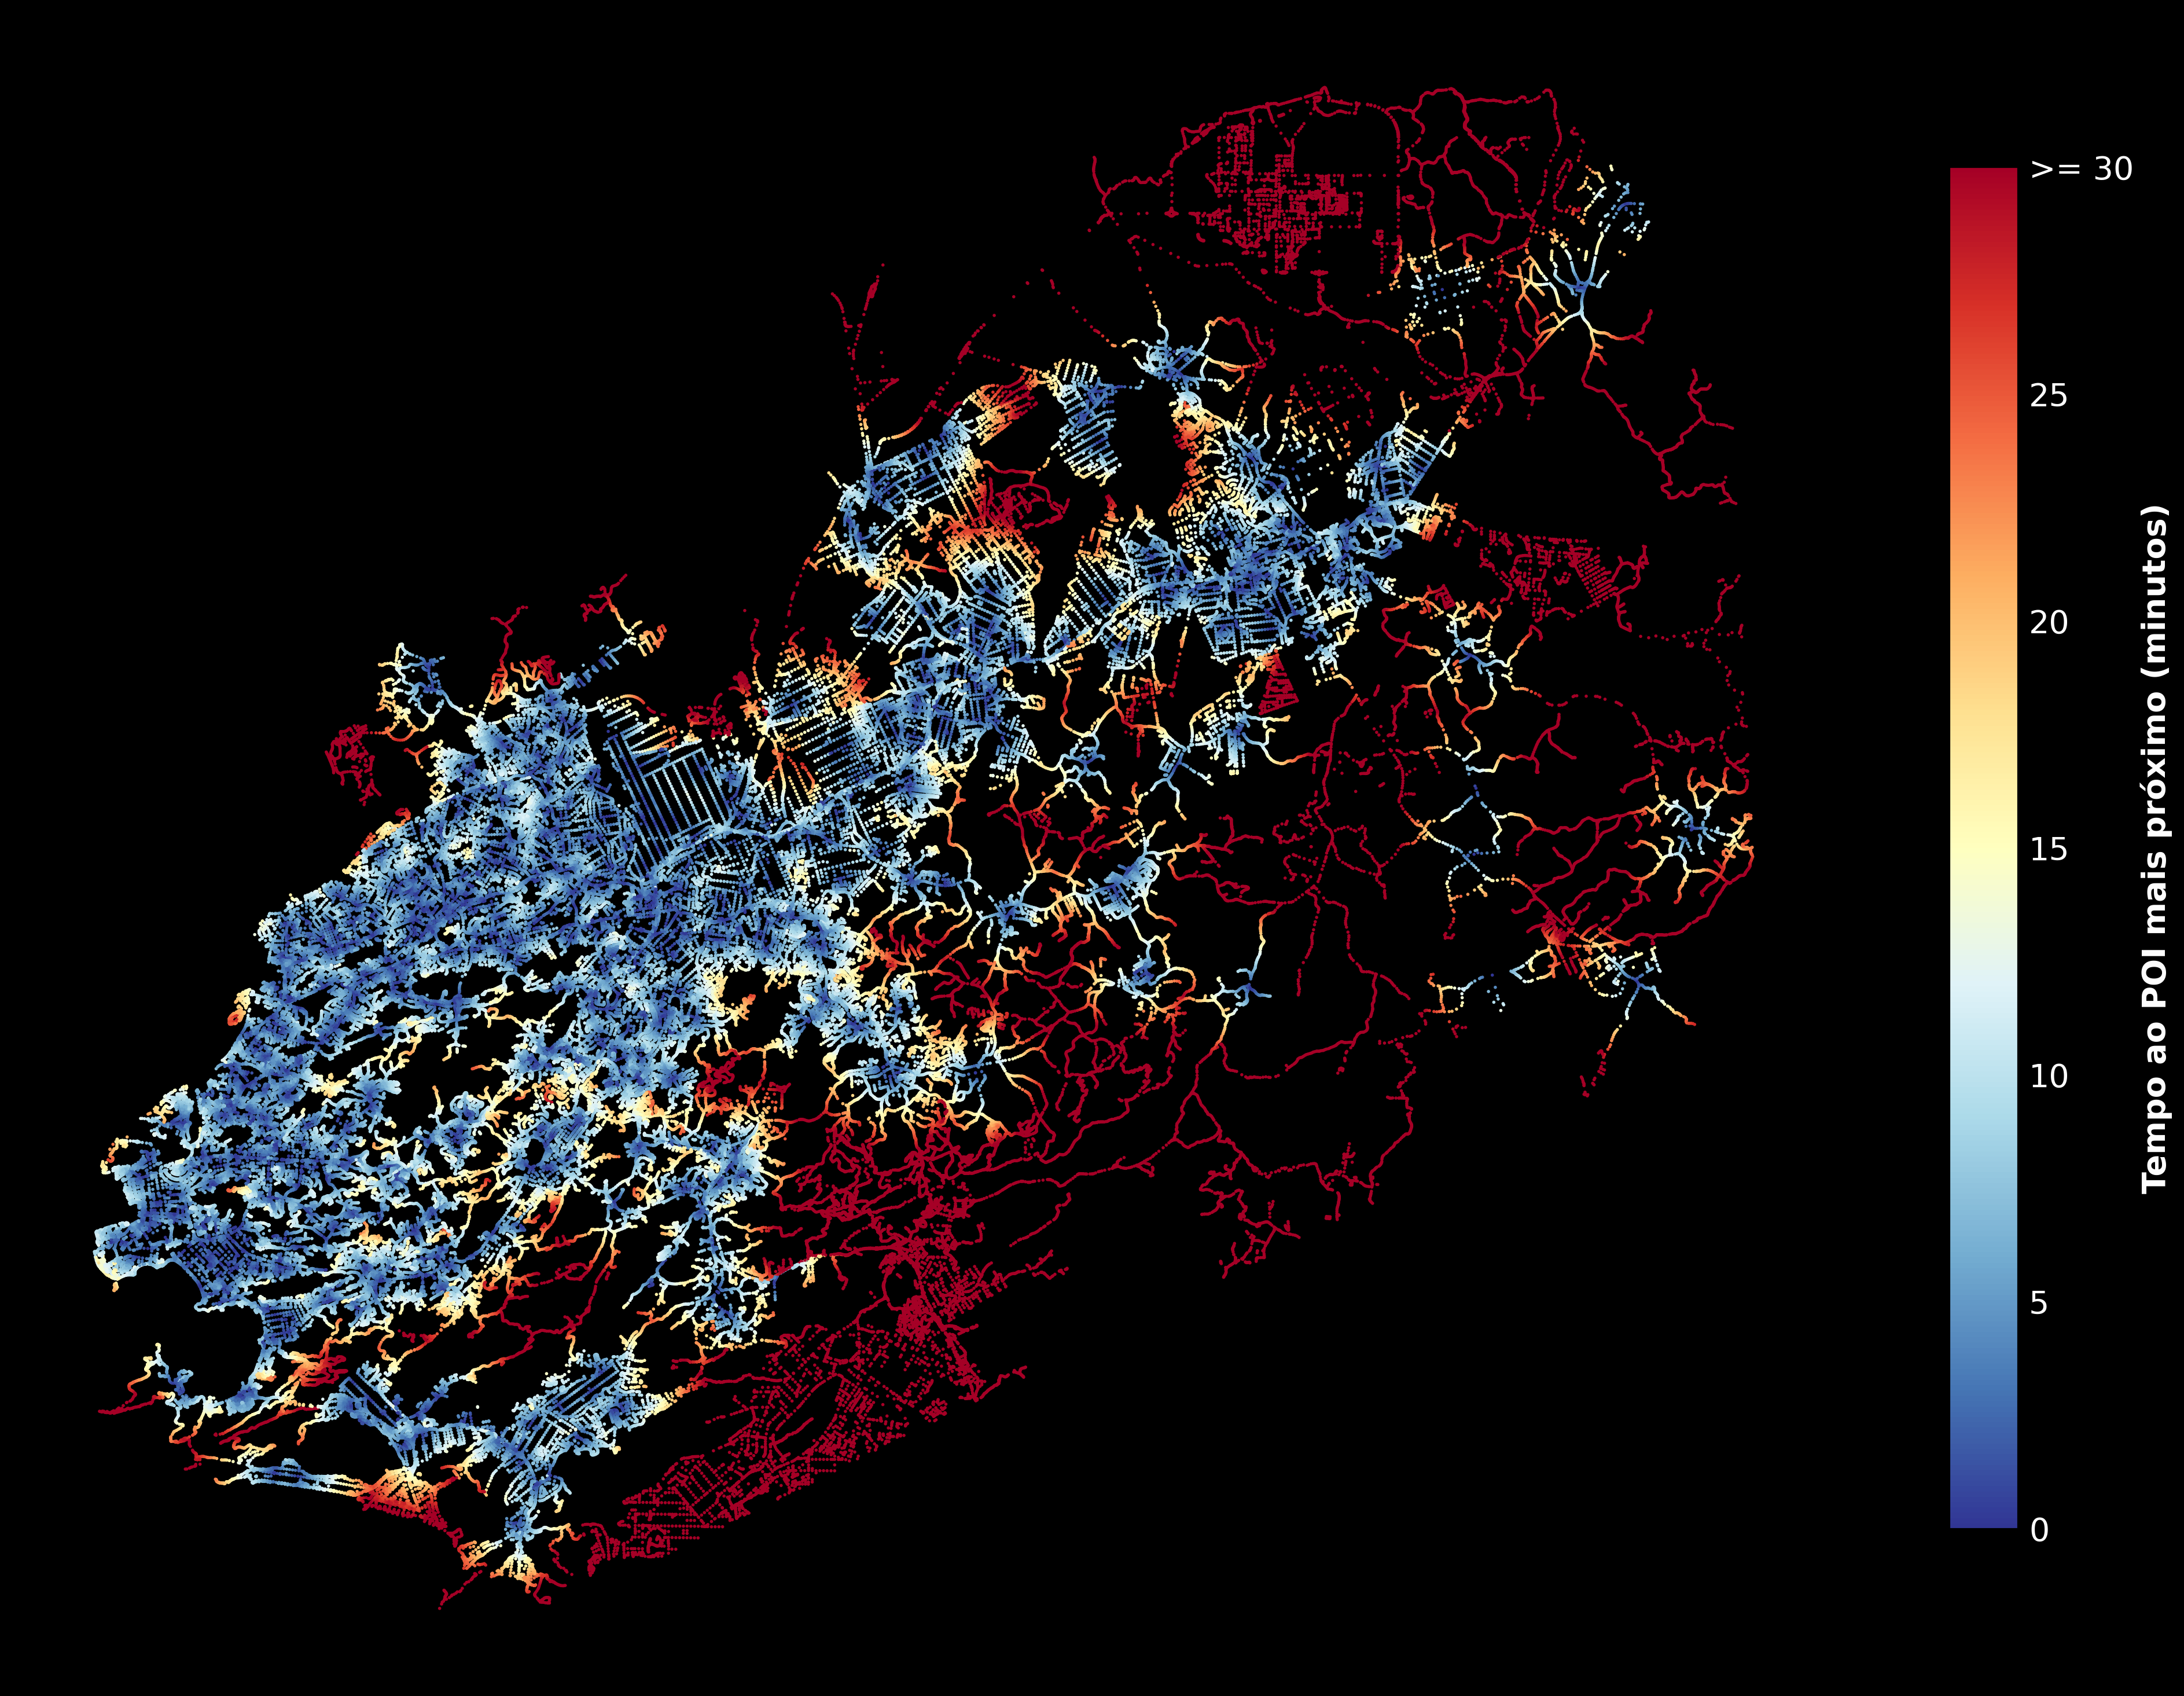

In [15]:
# Set text parameters
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# Setup plot
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
ax.set_aspect('equal')
fig.set_facecolor((0,0,0))

# Plot distance to nearest POI
sc = ax.scatter(
    x=nodes['x'],
    y=nodes['y'], 
    c=distances[1],
    s=1,
    cmap='RdYlBu_r',
)

# Colorbar
def ranged_labels(max_val, min_val=0, step=5):
    labels = [
        v for v in range(min_val, max_val, step)
        ]
    if not labels or labels[-1] < max_val:
        labels.append(max_val)

    return labels


def format_labels(nums):
    return [str(n) for n in nums[:-1]] + [f'>= {nums[-1]}'] if nums else []
    

cb = fig.colorbar(
    sc, ax=ax, shrink=0.8,
    ticks=[
        t * 60 # Dados em segundos, tempo máx. viagem, minutos
        for t
        in ranged_labels(tempo_maximo_viagem)
        ]
    )
cb.ax.tick_params(color='none', labelsize=20)
cb.ax.set_yticklabels(
    format_labels(
        ranged_labels(tempo_maximo_viagem)
        )
    )
cb.set_label('Tempo ao POI mais próximo (minutos)', fontsize=20, fontweight='bold')

# Remove empty space
plt.tight_layout()

## Gráficos

In [ ]:
pois